A globular cluster is a collection of stars in a galaxy that orbit around a common center. The common center is thought to be one or more black holes providing the gravity to maintain a spherical structure. The stars at the center of a cluster can be some of the oldest stars in a galaxy. The more spherical and dense the cluster, the older the cluster. The data I chose was collected from the European Space Agency (https://gea.esac.esa.int/archive/) Gaia mission, which has had a space observatory mapping out a 3D view of the milky way galaxy for a decade. The dataset on ESA website contains all of the visible stars in the galaxy (i.e. bright enough to capture and not covered by dust lanes). I worked with a friend in astrophysics to create a query that would pull out the following data from the website needed to conduct the analysis: ['ra','dec','parallax','parallax_error','phot_g_mean_mag','bp_rp','radial_velocity','radial_velocity_error']This query pulled the coordinates of the galaxy, the distance from earth (as a perceived angle shift), the brightness index, the color, and the radial velocity (how fast moving from/towards Earth). This created a data set that contains all stars greater than magnitude 13 (aka very bright) and contains the cluster I wanted to analyze. The cluster I am looking at is Omega Centauri which is the largest known cluster in the milky way galaxy.

Analyzing this data is important because it contains billions of new data points that hold information about our galaxy and the universe. Through analysis we can discover more history about our universe and better understand our science. Additionally, I am a non astrophysics researcher, potentially analyzing a star that no one else has even looked at before–and that’s pretty awesome.

By: Aminata Ndiaye

In [ ]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D plot
import plotly.graph_objects as go # interactive 3D plot
from scipy.integrate import quad
from scipy.stats import uniform
import pandas as pd
import math # for pi
from os import pidfd_open
from scipy import special # related to erf/inverse erf function
from scipy import stats # related to lognormal distribution
from scipy.stats import norm
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression

**ASTRO STATISTCS**

In [ ]:
#read in fits file
from astropy.table import Table as tb
from google.colab import drive
drive.mount('/content/drive')
gaia_data = tb.read("/content/drive/MyDrive/2023_24_classes/CEE373/HW11/glt13.fits", format='fits')
#print column names to see what indexes to use
gaia_data.colnames

Mounted at /content/drive


['ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error']

 Plotting the equivalent latitude and longitude coordinates of stars in the milky way near Omega Centauri. As a higher density of dots appear, we know we are near a globular cluster.

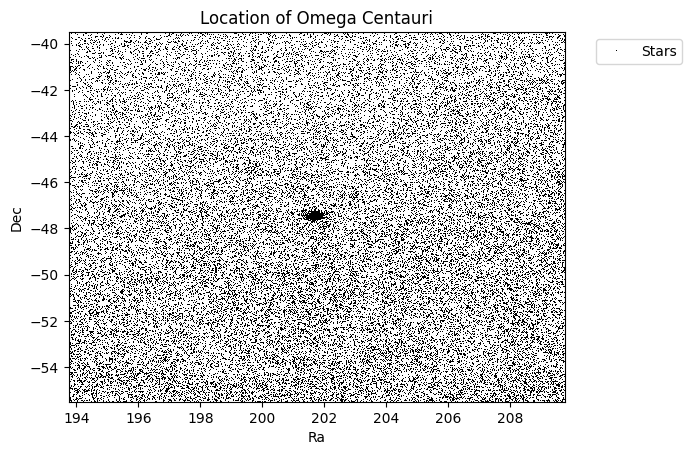

In [ ]:
###Through interpolation, I zoomed in on omega centauri
#pull out ra and dec columns
ra = gaia_data['ra']
dec = gaia_data['dec']
plt.plot(ra,dec,'k,',alpha=1, label = "Stars") #why alpha 0.6
# Label figure
plt.title("Location of Omega Centauri")
plt.xlabel('Ra') # Right ascension (RA) is the celestial equivalent of longitude
plt.ylabel('Dec') # Declination (Dec) is the celestial equivalent of latitude
#define tabulated coorindates for omega centauri
raOC =201.75
decOC = -47.5
#control zoom for interpolation
plt.xlim(raOC-8,raOC+8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(decOC-8,decOC+8)
plt.show()

The scatter plot below shows a color magnitude diagram (CMD) which plots the color vs. brightness magnitude of a star. The color of a star relates to temperature and the magnitude of the brightness of the star relates to the luminosity. The combination of these can be used to classify stars. From past research we know that red giants appear at the top right of a CMD. Red giants are stars that are at the beginning stages of dying. This is because they run out of hydrogen in their core and begin fusing hydrogen in the shell and heavier elements in the core. This causes them to bloat, cool their surface, and turn from white/yellow to red as well as become very bright. So, it makes sense that the scatterplot shows the red giants of omega centauri because the dataset was limited to the brightest stars (above mag 13) and globular clusters are composed of older stars, many of which are now red giants. So, the interesting story here is that we can identify the number of red giants above magnitude 13 in the omega centauri globular cluster. From the quantity of red giants, that gives us information that would allow us to conclude this is a globular cluster vs. a normal cluster, since the large red giant population indicates that the cluster is very old (and thus a globular cluster). We can use this to learn about the origin, kinematics, and evolution of complex stellar systems in the galaxy.

<ipython-input-11-514da7d94a09>:9: RuntimeWarning: invalid value encountered in log10
  absmag = gaia_data['phot_g_mean_mag'][zoomed_data] - 5*np.log10(distance_estimate/10.0)


Text(0.5, 1.0, 'Color-Magnitude Diagram of Omega Centauri')

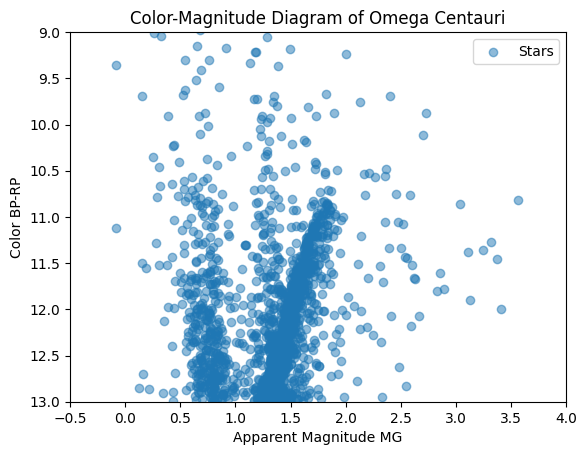

In [ ]:
#create data set using cordinates ra & dec
zoomed_data, = np.where((abs(gaia_data['ra']-raOC)<1)&(abs(gaia_data['dec']-decOC)<1))

#calculate distance from earth in parsecs (astronomy unit for large distances) from parallax equation defintion
distance_estimate = 1000.0/(gaia_data['parallax'][zoomed_data])
distance_estimate.name = 'distance(pc)'

#calculate the absolute given the apparent mag from the data normalized for distance
absmag = gaia_data['phot_g_mean_mag'][zoomed_data] - 5*np.log10(distance_estimate/10.0)
absmag.name = 'abs_mag_g'

#pull out magnitude and color columns
x_color = gaia_data['bp_rp'][zoomed_data]
y_mag= gaia_data['phot_g_mean_mag'][zoomed_data]

#plot the realtionship
plt.scatter(x_color, y_mag, alpha = 0.5, label = "Stars")
#zoom in on known structure of the red giant branch
plt.xlim(-0.5,4)
plt.ylim(13,9) #axis are flipped due to CMD custom

# Label figure
plt.xlabel("Apparent Magnitude MG") #magnitude of brightness
plt.ylabel("Color BP-RP") #color
plt.legend(loc='upper right')
plt.title("Color-Magnitude Diagram of Omega Centauri")

The plot below is interesting because it shows how a discovery of a cluster can be made. The left side of the plot displays a gaussian plume centered around 0. This is significant because it shows that the random patch of sky that I selected graphically displays random motion. Stars are moving around in random motions and are as likely to move away from Earth as they are to move towards Earth, which explains why it is centered around 0. The right side of the graph, however, shows a different truth: a cluster. We can understand that a mass of stars are all moving in the same direction, signifying a cluster held together by a center. Here, since the radial velocity of the group of stars is positive, it means that they are moving away from Earth. We can further confirm that this graphical representation of this patch of sky is correct since I have zoomed in on omega centauri. The stars outside of the cluster (background noise) are those in the left side of the graph centered around 0. They are not clustered and therefore are moving in their own random motions. Whereas omega centauri is represented by the group of stars on the right side of the graph, all moving together away from Earth.



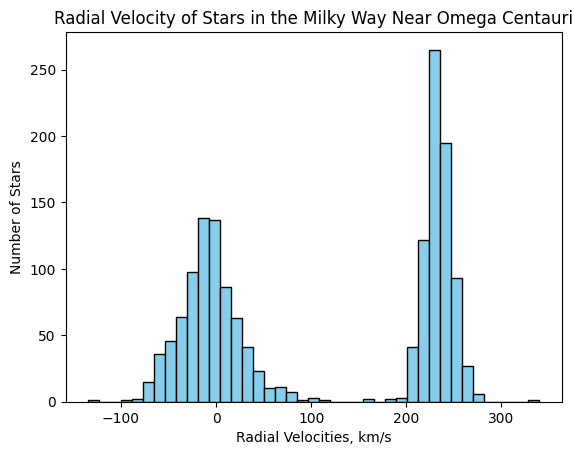

In [ ]:
#plot the radial velocity
rad_vel =gaia_data['radial_velocity'][zoomed_data]
bin_size = int(np.sqrt(len(rad_vel)))
plt.hist(rad_vel, bins=bin_size, color='skyblue', edgecolor='black')
# Label figure
plt.xlabel("Radial Velocities, km/s")
plt.ylabel("Number of Stars")
plt.title("Radial Velocity of Stars in the Milky Way Near Omega Centauri")
plt.show()


In [ ]:
#calculate sample statistics for radial velocity
mean=np.mean(rad_vel)
std=np.std(rad_vel)
print("The average radial velocity of the milky way stars is:", mean)
print("The standard deviation of the radial velocity of the milky way stars is:", std)

The average radial velocity of the milky way stars is: 111.21380191434133
The standard deviation of the radial velocity of the milky way stars is: 122.84658704065929


**Overall considerations for the data set:**
Because this is data from a government agency with the intention of using the data for analysis, it is very clean and not messy. The data was collected with probably absolute precision given that the Gaia observatory was developed after years of research and modeling. However, obtaining the data is hard if you are not familiar with the naming conventions—although their manual. pages are helpful for this. The data representation is the only thing that could be considered an issue. Due to our technological capacity and the fact that dust lanes can block objects, Gaia was only able to collect information on the brightest stars. These cataloged stars are the most visible behind dust lanes and over dimmer stars. So, technically there is data missing due to this and while analyzing it you’d have to take care to understand how your data could change if the missing data was added. This is something that, unfortunately, can’t be readily fixed.
